Chapter 13 dplyr verbs for clusterProfiler

In [1]:
library(DOSE)
data(geneList)
de = names(geneList)[1:100]
x = enrichDO(de)

Warning message:
“multiple methods tables found for ‘splitAsList’”
Warning message:
“replacing previous import ‘S4Vectors::splitAsList’ by ‘IRanges::splitAsList’ when loading ‘AnnotationDbi’”


DOSE v3.14.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609





13.1 filter


In [2]:
library(clusterProfiler.dplyr)


Attaching package: ‘clusterProfiler.dplyr’


The following object is masked from ‘package:stats’:

    filter




In [3]:
filter(x, p.adjust < .05, qvalue < 0.2)

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 DO 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:100] "4312" "8318" "10874" "55143" "55388" "991" "6280" "2305" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...28 enriched terms found
'data.frame':	28 obs. of  9 variables:
 $ ID         : chr  "DOID:0060071" "DOID:5295" "DOID:8719" "DOID:3007" ...
 $ Description: chr  "pre-malignant neoplasm" "intestinal disease" "in situ carcinoma" "breast ductal carcinoma" ...
 $ GeneRatio  : chr  "5/77" "9/77" "4/77" "4/77" ...
 $ BgRatio    : chr  "22/8007" "157/8007" "18/8007" "29/8007" ...
 $ pvalue     : num  1.67e-06 1.76e-05 2.18e-05 1.56e-04 2.08e-04 ...
 $ p.adjust   : num  0.00064 0.00279 0.00279 0.0136 0.0136 ...
 $ qvalue     : num  0.000461 0.002008 0.002008 0.009796 0.009796 ...
 $ geneID     : chr  "6280/6278/10232/332/4321" "4312/6279/3627/10563/4283/890/366/4902/3620" "6280/6278/10232/332" "6280/6279/4751/6286" ...
 $ Count      : int  5 9 4 4 13 6 13

13.2 arrange



In [4]:
mutate(x, geneRatio = parse_ratio(GeneRatio)) %>%
  arrange(desc(geneRatio))

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 DO 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:100] "4312" "8318" "10874" "55143" "55388" "991" "6280" "2305" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...28 enriched terms found
'data.frame':	28 obs. of  10 variables:
 $ ID         : chr  "DOID:3908" "DOID:120" "DOID:2394" "DOID:3459" ...
 $ Description: chr  "non-small cell lung carcinoma" "female reproductive organ cancer" "ovarian cancer" "breast carcinoma" ...
 $ GeneRatio  : chr  "13/77" "13/77" "10/77" "10/77" ...
 $ BgRatio    : chr  "431/8007" "455/8007" "312/8007" "383/8007" ...
 $ pvalue     : num  2.08e-04 3.52e-04 7.54e-04 3.48e-03 1.76e-05 ...
 $ p.adjust   : num  0.0136 0.01928 0.02625 0.04756 0.00279 ...
 $ qvalue     : num  0.0098 0.01389 0.0189 0.03424 0.00201 ...
 $ geneID     : chr  "6280/2305/9133/6279/7153/6278/6241/11065/10232/332/6286/3002/9212" "4312/6279/7153/3627/820/983/10232/6362/332/6286/9212/4321/6790" "4312/820/983/1

13.3 select


In [5]:
select(x, -geneID) %>% head

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
DOID:0060071,DOID:0060071,pre-malignant neoplasm,5/77,22/8007,1.671524e-06,0.0006401937,0.0004609887,5
DOID:5295,DOID:5295,intestinal disease,9/77,157/8007,1.759049e-05,0.0027885022,0.0020079362,9
DOID:8719,DOID:8719,in situ carcinoma,4/77,18/8007,2.184205e-05,0.0027885022,0.0020079362,4
DOID:3007,DOID:3007,breast ductal carcinoma,4/77,29/8007,1.564603e-04,0.0136037018,0.0097957122,4
DOID:3908,DOID:3908,non-small cell lung carcinoma,13/77,431/8007,2.075001e-04,0.0136037018,0.0097957122,13
DOID:0050589,DOID:0050589,inflammatory bowel disease,6/77,90/8007,2.131128e-04,0.0136037018,0.0097957122,6


13.4 mutate


In [6]:
y <- mutate(x, richFactor = Count / as.numeric(sub("/\\d+", "", BgRatio)))
y

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 DO 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:100] "4312" "8318" "10874" "55143" "55388" "991" "6280" "2305" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...28 enriched terms found
'data.frame':	28 obs. of  10 variables:
 $ ID         : chr  "DOID:0060071" "DOID:5295" "DOID:8719" "DOID:3007" ...
 $ Description: chr  "pre-malignant neoplasm" "intestinal disease" "in situ carcinoma" "breast ductal carcinoma" ...
 $ GeneRatio  : chr  "5/77" "9/77" "4/77" "4/77" ...
 $ BgRatio    : chr  "22/8007" "157/8007" "18/8007" "29/8007" ...
 $ pvalue     : num  1.67e-06 1.76e-05 2.18e-05 1.56e-04 2.08e-04 ...
 $ p.adjust   : num  0.00064 0.00279 0.00279 0.0136 0.0136 ...
 $ qvalue     : num  0.000461 0.002008 0.002008 0.009796 0.009796 ...
 $ geneID     : chr  "6280/6278/10232/332/4321" "4312/6279/3627/10563/4283/890/366/4902/3620" "6280/6278/10232/332" "6280/6279/4751/6286" ...
 $ Count      : int  5 9 4 4 13 6 1

In [7]:
library(ggplot2)
library(forcats)
library(enrichplot)

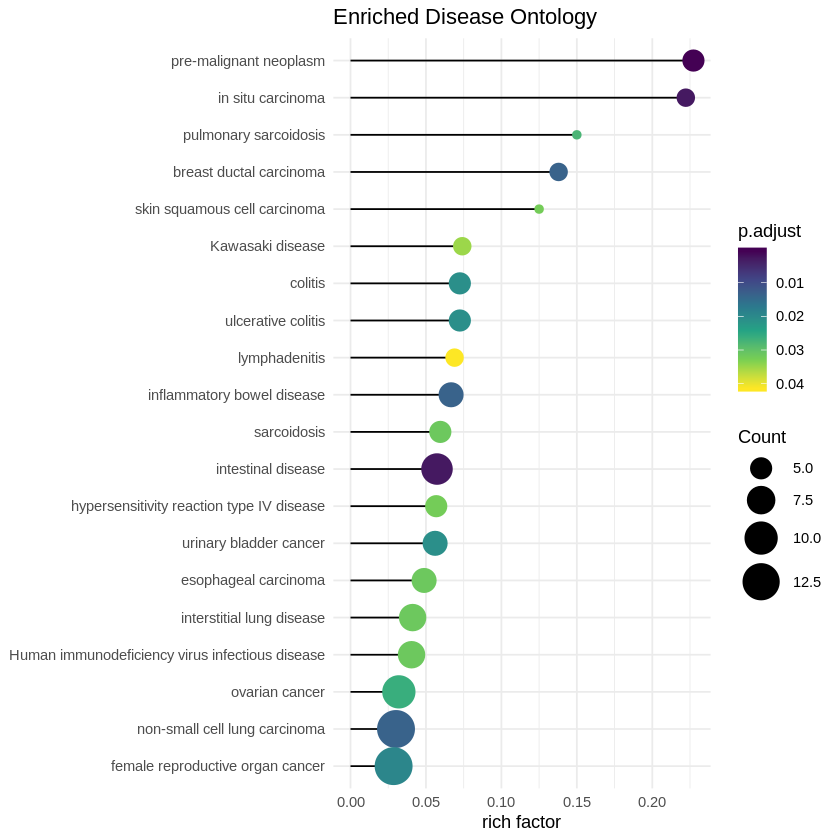

In [8]:
ggplot(y, showCategory = 20, 
       aes(richFactor, fct_reorder(Description, richFactor))) + 
  geom_segment(aes(xend=0, yend = Description)) +
  geom_point(aes(color=p.adjust, size = Count)) +
  scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE)) +
  scale_size_continuous(range=c(2, 10)) +
  theme_minimal() + 
  xlab("rich factor") +
  ylab(NULL) + 
  ggtitle("Enriched Disease Ontology")

In [9]:
mutate(x, FoldEnrichment = parse_ratio(GeneRatio) / parse_ratio(BgRatio))

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 DO 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:100] "4312" "8318" "10874" "55143" "55388" "991" "6280" "2305" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...28 enriched terms found
'data.frame':	28 obs. of  10 variables:
 $ ID            : chr  "DOID:0060071" "DOID:5295" "DOID:8719" "DOID:3007" ...
 $ Description   : chr  "pre-malignant neoplasm" "intestinal disease" "in situ carcinoma" "breast ductal carcinoma" ...
 $ GeneRatio     : chr  "5/77" "9/77" "4/77" "4/77" ...
 $ BgRatio       : chr  "22/8007" "157/8007" "18/8007" "29/8007" ...
 $ pvalue        : num  1.67e-06 1.76e-05 2.18e-05 1.56e-04 2.08e-04 ...
 $ p.adjust      : num  0.00064 0.00279 0.00279 0.0136 0.0136 ...
 $ qvalue        : num  0.000461 0.002008 0.002008 0.009796 0.009796 ...
 $ geneID        : chr  "6280/6278/10232/332/4321" "4312/6279/3627/10563/4283/890/366/4902/3620" "6280/6278/10232/332" "6280/6279/4751/6286" ...
 $ Count   

13.5 slice

In [10]:
library(ReactomePA)
data(geneList)
x <- gsePathway(geneList)

ReactomePA v1.28.0  For help: https://guangchuangyu.github.io/ReactomePA

If you use ReactomePA in published research, please cite:
Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for reactome pathway analysis and visualization. Molecular BioSystems 2016, 12(2):477-479

Loading required package: org.Hs.eg.db

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, ev

In [11]:
library(clusterProfiler.dplyr)
y <- arrange(x, abs(NES)) %>% 
  group_by(sign(NES)) %>% 
  slice(1:5)

ERROR: Error in new_Rle(values, lengths): Rle of type 'S4' is not supported


In [ ]:
library(forcats)
library(ggplot2)
library(ggstance)
library(enrichplot)

In [ ]:
ggplot(y, aes(NES, fct_reorder(Description, NES), fill=qvalues), showCategory=10) + 
  geom_barh(stat='identity') + 
  scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
  theme_minimal() + ylab(NULL)

13.6 summarise


In [ ]:
pi=seq(0, 1, length.out=11)

In [ ]:
mutate(x, pp = cut(pvalue, pi)) %>%
  group_by(pp) %>% 
  summarise(cnt = n()) %>% 
  ggplot(aes(pp, cnt)) + geom_col() + 
  theme_minimal() +
  xlab("p value intervals") +
  ylab("Frequency") + 
  ggtitle("p value distribution")